# Capstone Project: Credit Card Fraud Detection

### Adityo Dasgupta

In [ ]:
# import all the required libraries and dependencies for dataframe

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
import matplotlib.ticker as plticker
%matplotlib inline

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import statsmodels.api as sm
import pickle
import gc 
from sklearn import svm
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [16]:
# Reading the Credit Card file on which analysis needs to be done

df = pd.read_csv('/Users/adityodasgupta/Downloads/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
df.shape

(284807, 31)

In [18]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [20]:
# Calculating the Missing Values in the DF

df_null = df.isnull().mean()*100
df_null.sort_values(ascending=False).head()

Class    0.0
V14      0.0
V1       0.0
V2       0.0
V3       0.0
dtype: float64

We observed in the dataset has no null values and Hence, no Null treatment is required.

In [21]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     int64  
dtype: object


None of the columns have inconsistent datatype.Hence, no conversion is required.

#### Visualizing the Distribution of Target Variable

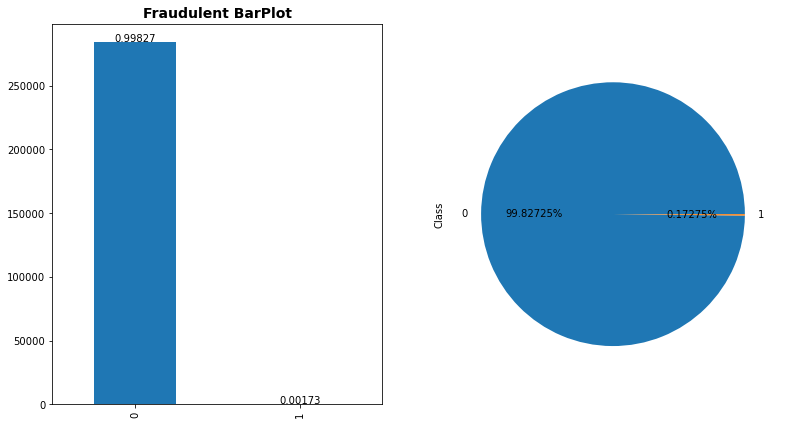

In [22]:
plt.figure(figsize=(13,7))
plt.subplot(121)
plt.title('Fraudulent BarPlot', fontweight='bold',fontsize=14)
ax = df['Class'].value_counts().plot(kind='bar')
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.5f}'.format(height/total),
            ha="center") 


plt.subplot(122)
df["Class"].value_counts().plot.pie(autopct = "%1.5f%%")
plt.show()

In [23]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


We need to balance the classes as the number of 0's is very large.

[None, None, None, None]

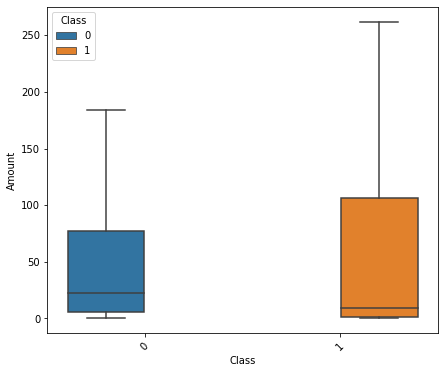

In [24]:
# Box Plot of amount for both classes
plt.figure(figsize = (7, 6))
a=sns.boxplot(x = 'Class', y = 'Amount',hue='Class', data = df,showfliers=False) 
plt.setp(a.get_xticklabels(), rotation=45)

Text(0, 0.5, 'Density')

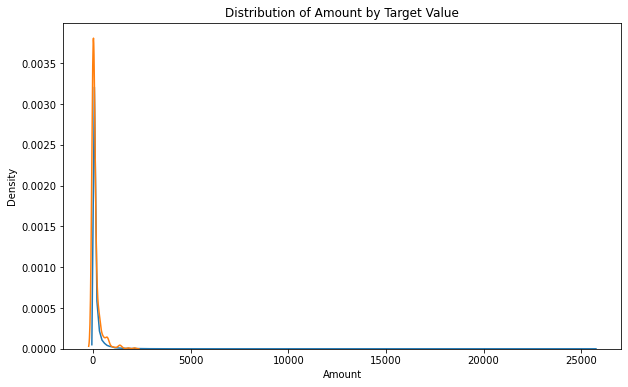

In [25]:
# KDE plot to visualize the distribution of Amount for both the classes
plt.rcParams['figure.figsize'] = [10,6]
sns.kdeplot(df.loc[df['Class'] == 0, 'Amount'], label = 'Non Fraud')
sns.kdeplot(df.loc[df['Class'] == 1, 'Amount'], label = 'Fraud')
plt.title('Distribution of Amount by Target Value')
plt.xlabel('Amount')
plt.ylabel('Density')

#### Inference:

- The distribution of amount for Fraud transactions is much higher than non-fradualent transactions. 

<AxesSubplot:title={'center':'Distribution of Transaction Time'}, ylabel='Density'>

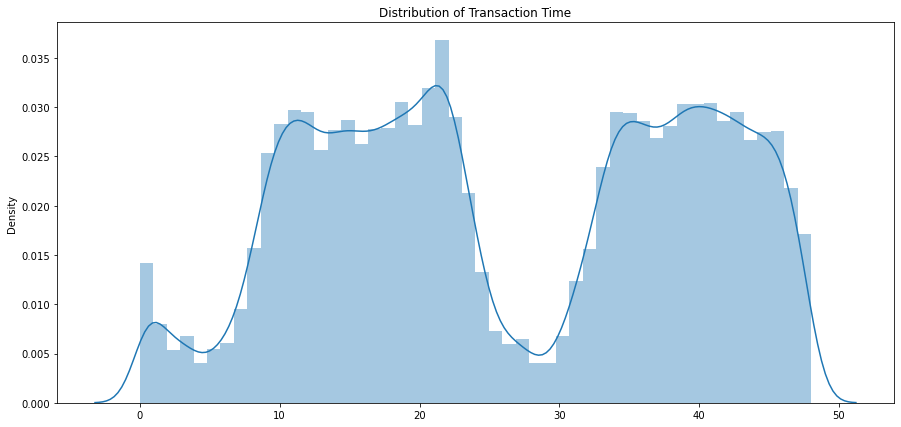

In [26]:
# Time Distribution plot for transactions 
plt.figure(figsize=(15,7))

plt.title('Distribution of Transaction Time')
sns.distplot(df['Time'].values/(60*60))

In [27]:
df_nonfraud = df_card[df_card.Class == 0]
df_fraud = df_card[df_card.Class == 1]

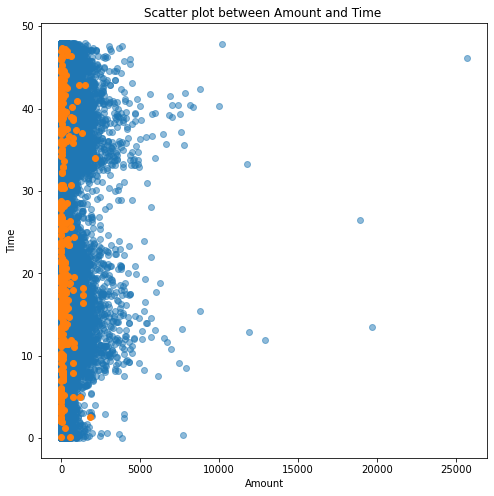

In [28]:
#Scatter plot between Time and Amount

fig = plt.figure(figsize = (8,8))
plt.scatter(df_nonfraud.Amount, df_nonfraud.Time.values/(60*60),alpha=0.5,label='Non Fraud')
plt.scatter(df_fraud.Amount, df_fraud.Time.values/(60*60),alpha=1,label='Fraud')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title('Scatter plot between Amount and Time ')
plt.show()

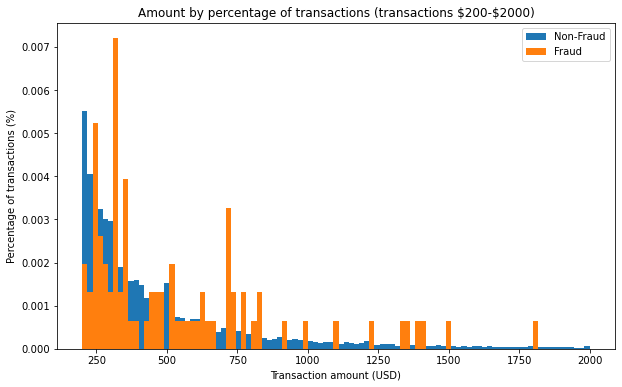

In [29]:
# Plot of high value transactions($200-$2000)

bins = np.linspace(200, 2000, 100)
plt.hist(df_nonfraud.Amount, bins, alpha=1, density=True, label='Non-Fraud')
plt.hist(df_fraud.Amount, bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

#### Inference:

- In the long tail, fraud transaction happened more frequently.

- It seems It would be hard to differentiate fraud from normal transactions by transaction amount alone.

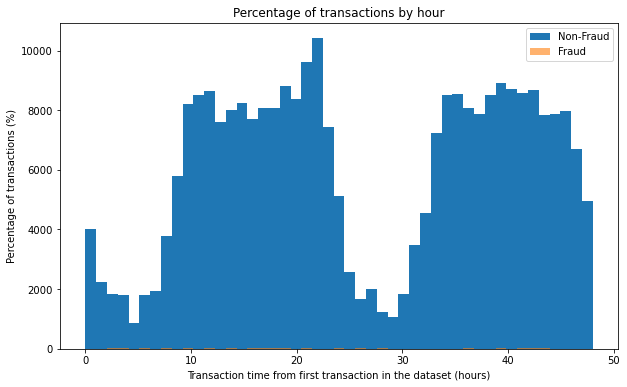

In [30]:
# Plot of transactions in 48 hours

bins = np.linspace(0, 48, 48)
plt.hist((df_nonfraud.Time/(60*60)), bins, alpha=1,label='Non-Fraud')
plt.hist((df_fraud.Time/(60*60)), bins, alpha=0.6,label='Fraud')
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time from first transaction in the dataset (hours)")
plt.ylabel("Percentage of transactions (%)")
plt.show()


Hour `zero` corresponds to the hour the first transaction happened and not necessarily `12-1 AM`. Given the heavy decrease in normal transactions from hours `1` to `8` and again roughly at hours `24` to `32`, 
it seems fraud tends to occur at higher rates during the night.

In [31]:
# Putting the feature variable into X

X = df.drop(['Class'],axis = 1)
X.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69


In [32]:
# Putting the Target variable to y

y = df['Class']

In [41]:
# Splitting the data into Train and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1,stratify=y)

In [46]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

Text(0, 0.5, 'Count')

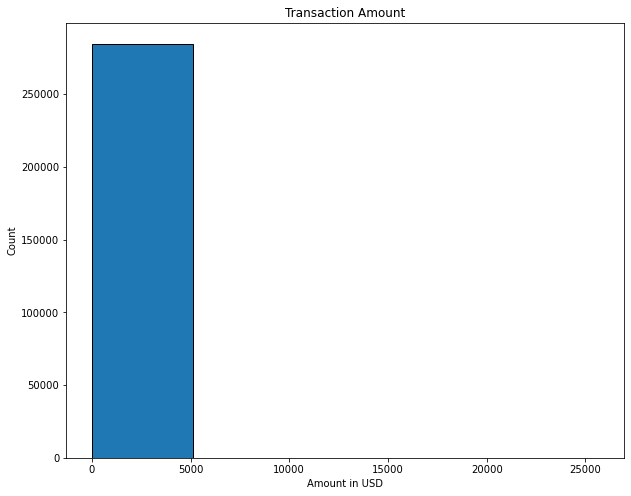

In [35]:
# Checking Skewness of data

plt.rcParams['figure.figsize'] = [10,8]
plt.hist(df['Amount'],edgecolor='k',bins = 5)
plt.title('Transaction Amount')
plt.xlabel('Amount in USD') 
plt.ylabel('Count')

In [36]:
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer

In [37]:
pt = preprocessing.PowerTransformer(copy=False)
PWTR_X = pt.fit_transform(X)

## We will need to balance the data set now

In [47]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# Resample training data
smote = SMOTE(random_state=5)
adasyn = ADASYN(random_state=5)

X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)
X_train_adasyn, y_train_adasyn =adasyn.fit_resample(X_train,y_train)

### Logistic Regression

In [48]:

from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train_ros, y_train_ros)

# Obtain model predictions
y_predicted = model_lr.predict(X_test)

In [49]:
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.06      0.92      0.11       148

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.97      0.99     85443

Confusion matrix:
 [[83121  2174]
 [   12   136]]
Logistic Regression Accuracy:  0.9744156923329003
ROC AUC :  0.9467154533629708


In [51]:
def plot_roc_curve(fpr,tpr,roc_auc):
    plt.plot(fpr, tpr, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

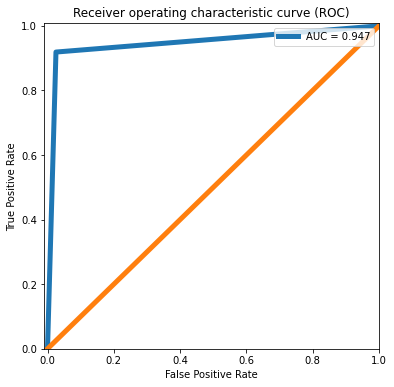

In [52]:

fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Result:
- Precision : 0.06
- Recall : 0.91
- F1-score : 0.11
- Accuracy : 0.97
- ROC AUC : 0.94

#### Model 1 : Logistic Regression on SMOTE Balanced Data

In [53]:
# Fit a logistic regression model to our data
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train_smote, y_train_smote)


y_predicted = model_lr.predict(X_test)

In [54]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.05      0.92      0.10       148

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443

Confusion matrix:
 [[82957  2338]
 [   12   136]]
Logistic Regression Accuracy:  0.9724962840724225
ROC AUC :  0.9457540839978263


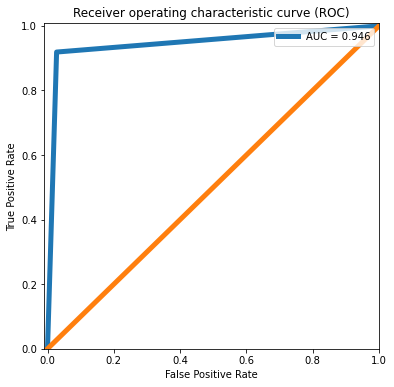

In [55]:

fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Inference:
- Precision : 0.06
- Recall : 0.91
- F1-score : 0.11
- Accuracy : 0.97
- ROC AUC : 0.94

#### Model 2 : Logistic Regression on ADASYN Balanced Data

In [56]:

from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train_adasyn, y_train_adasyn)

# Obtain model predictions
y_predicted = model_lr.predict(X_test)

In [57]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     85295
           1       0.02      0.97      0.04       148

    accuracy                           0.91     85443
   macro avg       0.51      0.94      0.50     85443
weighted avg       1.00      0.91      0.95     85443

Confusion matrix:
 [[77740  7555]
 [    5   143]]
Logistic Regression Accuracy:  0.9115199606755381
ROC AUC :  0.9388206352198967


#### Result:
- Precision : 0.02
- Recall : 0.91
- F1-score : 0.04
- Accuracy : 0.91
- ROC AUC : 0.93

### Random Forest

#### Model 3 : Random Forest on ROS Balanced Data

In [58]:

model_rfc = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:10}, 
                               criterion='entropy',
                               max_depth=10, 
                               min_samples_leaf=10, 
                               n_estimators=20, 
                               n_jobs=-1, 
                               random_state=5)

In [59]:
# Fit the model on train data and predict on test data 
model_rfc.fit(X_train_ros,y_train_ros)
y_predicted = model_rfc.predict(X_test)

In [60]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.37      0.88      0.52       148

    accuracy                           1.00     85443
   macro avg       0.68      0.94      0.76     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85072   223]
 [   18   130]]
Logistic Regression Accuracy:  0.9971794061538102
ROC AUC :  0.9378819613329257


#### Result:
- Precision : 0.46
- Recall : 0.79
- F1-score : 0.58
- Accuracy : 0.99
- ROC AUC : 0.93

#### Model 4 : Random Forest on SMOTE Balanced Data

In [61]:
# Fit the model on train data and predict on test data 
model_rfc.fit(X_train_smote,y_train_smote)
y_predicted = model_rfc.predict(X_test)

In [62]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.93      0.13       148

    accuracy                           0.98     85443
   macro avg       0.54      0.95      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83503  1792]
 [   11   137]]
Logistic Regression Accuracy:  0.9788982128436502
ROC AUC :  0.9523331189211369


#### Result:
- Precision : 0.06
- Recall : 0.84
- F1-score : 0.12
- Accuracy : 0.97
- ROC AUC : 0.95

#### Model 5 : Random Forest on ADASYN Balanced Data

In [63]:
# Fit the model on train data and predict on test data 
model_rfc.fit(X_train_adasyn,y_train_adasyn)
y_predicted = model_rfc.predict(X_test)

In [64]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     85295
           1       0.03      0.93      0.06       148

    accuracy                           0.95     85443
   macro avg       0.51      0.94      0.51     85443
weighted avg       1.00      0.95      0.97     85443

Confusion matrix:
 [[80747  4548]
 [   10   138]]
Logistic Regression Accuracy:  0.9466544948094051
ROC AUC :  0.9395558023584285


#### Result:
- Precision : 0.03
- Recall : 0.84
- F1-score : 0.06
- Accuracy : 0.95
- ROC AUC : 0.94

Let's do a Hyperparameter tuning on ROS data as it gave a better Recall and Precision

#### Hyperparameter Tuning Random Forest on ROS Data

#### Model 6: Hyper Tuning  model Random Forest on ROS Balanced Data

In [65]:
params = { 
    'n_estimators': [200, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
cross_val = StratifiedKFold(n_splits=2)
index_iterator = cross_val.split(X_train_ros, y_train_ros)
clf = RandomForestClassifier()
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = params, n_iter = 10, cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [72]:
clf_random.fit(X_train_ros, y_train_ros)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  5.6min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  9.7min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [200, 400]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [73]:
scores = clf_random.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,68.845410,0.239663,2.014655,0.026651,200,auto,4,gini,"{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 4, 'criterion': 'gini'}",0.990455,0.989552,0.990004,0.000452,9
1,114.201477,0.502020,4.074107,0.001975,400,log2,4,gini,"{'n_estimators': 400, 'max_features': 'log2', 'max_depth': 4, 'criterion': 'gini'}",0.990269,0.988981,0.989625,0.000644,10
2,97.528526,1.262736,2.237328,0.024297,200,auto,5,entropy,"{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'entropy'}",0.995994,0.995598,0.995796,0.000198,7
3,236.270363,10.977604,4.483070,0.062675,400,sqrt,6,entropy,"{'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'entropy'}",0.998388,0.998180,0.998284,0.000104,4
4,195.668065,0.197297,4.200542,0.035959,400,auto,6,gini,"{'n_estimators': 400, 'max_features': 'auto', 'max_depth': 6, 'criterion': 'gini'}",0.997340,0.996965,0.997153,0.000188,6


In [74]:
print(clf_random.best_score_)
print(clf_random.best_params_)
print(clf_random.best_index_)

0.9999192483224074
{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'entropy'}
5


In [75]:
# Insanitiate Model on best params
model_rfc_tuned = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12}, 
                               criterion='entropy',
                               max_depth=8, 
                               max_features='auto',
                               n_estimators=200,
                               n_jobs=-1)

In [76]:
#Fit the model on train data and predict the model on test data
model_rfc_tuned.fit(X_train_ros,y_train_ros)
y_predicted = model_rfc_tuned.predict(X_test)

In [77]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.11      0.91      0.20       148

    accuracy                           0.99     85443
   macro avg       0.56      0.95      0.60     85443
weighted avg       1.00      0.99      0.99     85443

Confusion matrix:
 [[84257  1038]
 [   14   134]]
Logistic Regression Accuracy:  0.9876876982315695
ROC AUC :  0.9466179380623369


#### Result:
- Precision : 0.20
- Recall : 0.79
- F1-score : 0.32
- Accuracy : 0.99
- ROC AUC : 0.94

### XG Boost

#### Model 7 : XGB on ROS Balanced Data

In [78]:
model_xgb_ros = XGBClassifier()

In [79]:
#Fit the model on train data and predict the model on test data
model_xgb_ros.fit(X_train_ros,y_train_ros)
y_predicted = model_xgb_ros.predict(X_test)

In [80]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.85      0.87       148

    accuracy                           1.00     85443
   macro avg       0.95      0.93      0.94     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85280    15]
 [   22   126]]
Logistic Regression Accuracy:  0.9995669627705019
ROC AUC :  0.9255877455508148


#### Result:
- Precision : 0.92
- Recall : 0.78
- F1-score : 0.84
- Accuracy : 0.99
- ROC AUC : 0.92

#### Hyperparameter Tuning on ROS Balanced data

#### Model 8 : Hyper Tuning XGB on ROS Balanced Data

In [81]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [82]:
cross_val = StratifiedKFold(n_splits=4)
index_iterator = cross_val.split(X_train_ros, y_train_ros)


xgb_cross = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1) 


xgb_random = RandomizedSearchCV(estimator = xgb_cross, param_distributions = params, n_iter =10 , cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [83]:
xgb_random.fit(X_train_ros, y_train_ros)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  6.1min finished


[01:28:45] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           int...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                

In [85]:
scores = xgb_random.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_min_child_weight,param_max_depth,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,65.747016,0.808110,0.392810,0.031858,0.8,10,4,1.5,0.6,"{'subsample': 0.8, 'min_child_weight': 10, 'max_depth': 4, 'gamma': 1.5, 'colsample_bytree': 0.6}",0.998368,0.998587,0.998272,0.998495,0.998431,0.000120,5
1,67.036835,0.239524,0.327646,0.020993,1,1,3,2,0.8,"{'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 3, 'gamma': 2, 'colsample_bytree': 0.8}",0.993532,0.994064,0.993807,0.994459,0.993965,0.000341,9
2,72.941606,0.054868,0.286313,0.017479,0.8,10,3,5,1,"{'subsample': 0.8, 'min_child_weight': 10, 'max_depth': 3, 'gamma': 5, 'colsample_bytree': 1.0}",0.993562,0.994383,0.993736,0.994246,0.993982,0.000342,8
3,45.240147,0.298948,0.286261,0.009341,0.6,10,3,1,0.6,"{'subsample': 0.6, 'min_child_weight': 10, 'max_depth': 3, 'gamma': 1, 'colsample_bytree': 0.6}",0.994141,0.994937,0.994501,0.995049,0.994657,0.000361,6
4,56.937378,0.206210,0.329204,0.003034,0.6,10,4,1,0.6,"{'subsample': 0.6, 'min_child_weight': 10, 'max_depth': 4, 'gamma': 1, 'colsample_bytree': 0.6}",0.998446,0.998495,0.998364,0.998492,0.998449,0.000053,4


In [86]:
print(xgb_random.best_score_)
print(xgb_random.best_params_)
print(xgb_random.best_index_)

0.9997210123192227
{'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 5, 'colsample_bytree': 0.8}
9


In [87]:
model_xgb_tuned_ros = XGBClassifier(min_child_weight= 5,
        gamma= 1.5,
        subsample= 1.0,
        colsample_bytree= 0.8,
        max_depth= 5)

In [88]:
#Fit the model on train data and predict the model on test data
model_xgb_tuned_ros.fit(X_train_ros,y_train_ros)
y_predicted = model_xgb_tuned_ros.predict(X_test)

In [89]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.86      0.87       148

    accuracy                           1.00     85443
   macro avg       0.94      0.93      0.94     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85277    18]
 [   20   128]]
Logistic Regression Accuracy:  0.9995552590615966
ROC AUC :  0.9323269162825994


#### Result:
- Precision : 0.91
- Recall : 0.76
- F1-score : 0.83
- Accuracy : 0.99
- ROC AUC : 0.93

#### Model 9 : XGB on SMOTE Balanced Data

In [95]:
model_xgb_smote = XGBClassifier()

In [96]:
#Fit the model on train data and predict the model on test data
model_xgb_smote.fit(X_train_smote,y_train_smote)
y_predicted = model_xgb_smote.predict(X_test)

In [97]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.75      0.88      0.81       148

    accuracy                           1.00     85443
   macro avg       0.87      0.94      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85251    44]
 [   18   130]]
Logistic Regression Accuracy:  0.9992743700478681
ROC AUC :  0.938931260822931


#### Result:
- Precision : 0.82
- Recall : 0.76
- F1-score : 0.79
- Accuracy : 0.99
- ROC AUC : 0.94

#### Hyperparameter Tuning on Smote Balanced data

#### Model 10 : Hyper Tuning XGB on SMOTE Balanced Data

In [98]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10,15],
        'gamma': [0.5, 1, 1.5, 2, 5,8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0,1.2],
        'max_depth': [3, 4, 5,6,7]
        }

In [99]:
cross_val = StratifiedKFold(n_splits=5)
index_iterator = cross_val.split(X_train_smote, y_train_smote)


xgb_cross = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1) 


xgb_random = RandomizedSearchCV(estimator = xgb_cross, param_distributions = params, n_iter =10 , cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [100]:
xgb_random.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.8min finished


[01:43:43] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           int...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                     

In [102]:

scores = xgb_random.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_min_child_weight,param_max_depth,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.698812,0.055507,0.00000,0.00000,0.8,15,6,0.5,1.2,"{'subsample': 0.8, 'min_child_weight': 15, 'max_depth': 6, 'gamma': 0.5, 'colsample_bytree': 1.2}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,168.872892,0.507735,0.25007,0.01299,1,10,4,1.5,1,"{'subsample': 1.0, 'min_child_weight': 10, 'max_depth': 4, 'gamma': 1.5, 'colsample_bytree': 1.0}",0.993773,0.993842,0.994042,0.993945,0.993826,0.993886,0.000096,4
2,0.762342,0.120824,0.00000,0.00000,0.8,15,5,2,1.2,"{'subsample': 0.8, 'min_child_weight': 15, 'max_depth': 5, 'gamma': 2, 'colsample_bytree': 1.2}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,0.550459,0.038665,0.00000,0.00000,1,1,7,0.5,1.2,"{'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 7, 'gamma': 0.5, 'colsample_bytree': 1.2}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
4,0.586470,0.042752,0.00000,0.00000,0.6,5,4,0.5,1.2,"{'subsample': 0.6, 'min_child_weight': 5, 'max_depth': 4, 'gamma': 0.5, 'colsample_bytree': 1.2}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [103]:
print(xgb_random.best_score_)
print(xgb_random.best_params_)
print(xgb_random.best_index_)

0.9990298477386951
{'subsample': 0.8, 'min_child_weight': 15, 'max_depth': 6, 'gamma': 1, 'colsample_bytree': 0.8}
7


In [106]:
model_xgb_tuned_smote = XGBClassifier(min_child_weight= 10,
        gamma= 1,
        subsample= 0.8,
        colsample_bytree= 0.8,
        max_depth= 6)

In [108]:
#Fit the model on train data and predict the model on test data
model_xgb_tuned_smote.fit(X_train_smote,y_train_smote)
y_predicted = model_xgb_tuned_smote.predict(X_test)

In [109]:
#Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.70      0.89      0.78       148

    accuracy                           1.00     85443
   macro avg       0.85      0.94      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85240    55]
 [   17   131]]
Logistic Regression Accuracy:  0.9991573329588147
ROC AUC :  0.9422451571097447


#### Result:
- Precision : 0.95
- Recall : 0.72
- F1-score : 0.82
- Accuracy : 0.99
- ROC AUC : 0.94

#### Model 11 : XGB on ADASYN Balanced Data

In [110]:
model_xgb_adasyn = XGBClassifier()

In [111]:
#Fit the model on train data and predict the model on test data
model_xgb_adasyn.fit(X_train_adasyn,y_train_adasyn)
y_predicted = model_xgb_adasyn.predict(X_test)

In [112]:
#Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.73      0.89      0.80       148

    accuracy                           1.00     85443
   macro avg       0.86      0.94      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85246    49]
 [   17   131]]
Logistic Regression Accuracy:  0.9992275552122467
ROC AUC :  0.942280329159689


#### Result:
- Precision : 0.76
- Recall : 0.76
- F1-score : 0.76
- Accuracy : 0.99
- ROC AUC : 0.94

#### Model 12: Hyperparameter Tuning on Adasyn Balanced data

In [113]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [114]:
cross_val = StratifiedKFold(n_splits=5)
index_iterator = cross_val.split(X_train_adasyn, y_train_adasyn)


xgb_cross = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1) 


xgb_random = RandomizedSearchCV(estimator = xgb_cross, param_distributions = params, n_iter =10 , cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [115]:
xgb_random.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 12.3min finished


[02:13:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           int...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                

In [117]:
scores = xgb_random.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_min_child_weight,param_max_depth,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,95.801461,0.317355,0.290931,0.011294,0.8,10,4,1.5,0.6,"{'subsample': 0.8, 'min_child_weight': 10, 'max_depth': 4, 'gamma': 1.5, 'colsample_bytree': 0.6}",0.978852,0.944331,0.978888,0.982991,0.988749,0.974762,0.015641,4
1,100.772187,1.668000,0.231306,0.007535,1,1,3,2,0.8,"{'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 3, 'gamma': 2, 'colsample_bytree': 0.8}",0.967700,0.917333,0.971906,0.974153,0.978895,0.961998,0.022623,7
2,108.796910,0.253993,0.230370,0.015448,0.8,10,3,5,1,"{'subsample': 0.8, 'min_child_weight': 10, 'max_depth': 3, 'gamma': 5, 'colsample_bytree': 1.0}",0.964776,0.907731,0.971811,0.974556,0.978431,0.959461,0.026247,9
3,61.170552,0.186205,0.224721,0.002444,0.6,10,3,1,0.6,"{'subsample': 0.6, 'min_child_weight': 10, 'max_depth': 3, 'gamma': 1, 'colsample_bytree': 0.6}",0.969051,0.926884,0.972653,0.973616,0.979762,0.964393,0.019069,6
4,81.709334,0.157874,0.262529,0.003245,0.6,10,4,1,0.6,"{'subsample': 0.6, 'min_child_weight': 10, 'max_depth': 4, 'gamma': 1, 'colsample_bytree': 0.6}",0.978080,0.945027,0.979286,0.983410,0.989123,0.974985,0.015469,3


In [118]:
print(xgb_random.best_score_)
print(xgb_random.best_params_)
print(xgb_random.best_index_)

0.9808645164558619
{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 1.5, 'colsample_bytree': 0.6}
5


In [121]:
model_xgb_tuned_adasyn = XGBClassifier(min_child_weight= 10,
        gamma= 1.5,
        subsample= 1.0,
        colsample_bytree= 0.6,
        max_depth= 5)

In [122]:
#Fit the model on train data and predict the model on test data
model_xgb_tuned_adasyn.fit(X_train_adasyn,y_train_adasyn)
y_predicted = model_xgb_tuned_adasyn.predict(X_test)

In [123]:
#Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.53      0.89      0.67       148

    accuracy                           1.00     85443
   macro avg       0.77      0.95      0.83     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85180   115]
 [   16   132]]
Logistic Regression Accuracy:  0.9984668141333989
ROC AUC :  0.94527181498868


#### Result:
- Precision : 0.54
- Recall : 0.77
- F1-score : 0.64
- Accuracy : 0.99
- ROC AUC : 0.94

#### Best Model considering various parameters and scenarios

In nutshell rather than aiming for overall accuracy on the entire dataset, we cared more about detecting most of the fraud cases (recall), whilst keeping the cost at which this is achieved under control (precision).We have applied XGBoost on Smote data and got the best evaluation metrices.

In [124]:
#Predicting on the test data using the best model
y_predicted = model_xgb_smote.predict(X_test)

In [125]:
# Create true and false positive rates
fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)

In [126]:
# Printing Evaluation Metrices
print('Classification report for XGBoost Smote:\n', classification_report(y_test, y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold:",threshold)

Classification report for XGBoost Smote:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.75      0.88      0.81       148

    accuracy                           1.00     85443
   macro avg       0.87      0.94      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Logistic Regression Accuracy:  0.9992743700478681
ROC AUC :  0.938931260822931
Confusion matrix:
 [[85251    44]
 [   18   130]]
Threshold: 1


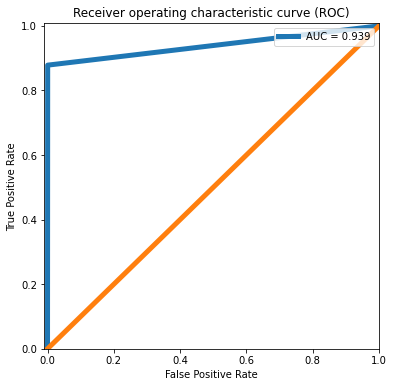

In [127]:
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Result:
- Precision : 0.82
- Recall : 0.76
- F1-score : 0.79
- Accuracy : 0.99
- ROC AUC : 0.93

#### Important Features

In [128]:
target = 'Class'
pca_comp = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount', 'Time']

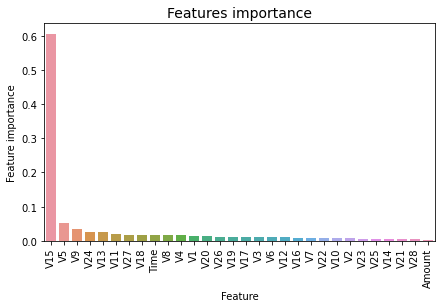

In [129]:
tmp = pd.DataFrame({'Feature': pca_comp, 'Feature importance': model_xgb_smote.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

#### Inference:
We found out that PCA converted variables like V15, V5 are able to explain the maximum variance and hence we can target these variables to detect a fraud.